In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import requests, io, os
from zipfile import ZipFile

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.float_format', lambda x: '%.4f' % x)
plt.rcParams['figure.figsize'] = [16, 12]

DOWNLOADS_FOLDER = 'downloads'
UF = 'SC'

# Baixa os registros de acidentes de 2021 (PRF)

In [3]:
url = 'http://arquivos.prf.gov.br/arquivos/index.php/s/n1T3lymvIdDOzzb/download'
response = requests.get(url, stream=True)

# Cria a pasta de downloads caso ela não exista:
try:
    os.stat(DOWNLOADS_FOLDER)
except:
    os.mkdir(DOWNLOADS_FOLDER)

open(os.path.join(DOWNLOADS_FOLDER,'datatran2021.zip'), 'wb').write(response.content)

2446665

# Baixa o shapefile do estado escolhido (IBGE)

In [4]:
url = f'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2020/UFs/{UF}/{UF}_Municipios_2020.zip'
response = requests.get(url, stream=True)

# Cria a pasta de downloads caso ela não exista:
try:
    os.stat(DOWNLOADS_FOLDER)
except:
    os.mkdir(DOWNLOADS_FOLDER)

open(os.path.join(DOWNLOADS_FOLDER,f'{UF}_Municipios_2020.zip'), 'wb').write(response.content)

29500126

# Carrega os registros de acidentes

In [5]:
zf = ZipFile(os.path.join(DOWNLOADS_FOLDER, 'datatran2021.zip')) 
df_acidentes = pd.read_csv(
    zf.open('datatran2021.csv'), 
    delimiter=";", 
    encoding="ISO-8859-1", 
    decimal=",")

In [6]:
df_acidentes.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331693,2021-01-01,sexta-feira,00:02:00,SC,101.0000,314.9000,LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Dupla,Reta,Não,3,0,1,0,2,0,1,2,-28.43029392,-48.84925073,SR-SC,UOP01,DEL02
1,331694,2021-01-01,sexta-feira,00:15:00,PR,376.0000,188.0000,MARIALVA,Velocidade Incompatível,Colisão com objeto,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Não,2,0,2,0,0,0,2,1,-23.46634923,-51.82808011,SR-PR,UOP01,DEL09
2,331696,2021-01-01,sexta-feira,00:00:00,SP,116.0000,110.6000,TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,Sem Vítimas,Plena Noite,Crescente,Nublado,Dupla,Reta,Sim,1,0,0,0,1,0,0,1,-23.03412614,-45.5526999,SR-SP,UOP01,DEL06
3,331699,2021-01-01,sexta-feira,01:20:00,SC,101.0000,111.0000,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Múltipla,Curva,Sim,3,0,2,0,1,0,2,2,-26.83955734,-48.71418074,SR-SC,UOP04,DEL04
4,331701,2021-01-01,sexta-feira,00:30:00,PE,101.0000,45.1000,IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Múltipla,Desvio Temporário,Sim,2,0,0,1,1,0,1,2,-7.86521297,-34.90715176,SR-PE,UOP02,DEL01


In [7]:
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53475 entries, 0 to 53474
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      53475 non-null  int64  
 1   data_inversa            53475 non-null  object 
 2   dia_semana              53475 non-null  object 
 3   horario                 53475 non-null  object 
 4   uf                      53475 non-null  object 
 5   br                      53329 non-null  float64
 6   km                      53329 non-null  float64
 7   municipio               53475 non-null  object 
 8   causa_acidente          53475 non-null  object 
 9   tipo_acidente           53475 non-null  object 
 10  classificacao_acidente  53475 non-null  object 
 11  fase_dia                53475 non-null  object 
 12  sentido_via             53475 non-null  object 
 13  condicao_metereologica  53475 non-null  object 
 14  tipo_pista              53475 non-null

# Carrega o shapefile do estado escolhido

In [8]:
zip_file = os.path.join(DOWNLOADS_FOLDER, f'{UF}_Municipios_2020.zip')
zip_file = zip_file + f"!{UF}_Municipios_2020.shp"
df_shape = gpd.read_file(zip_file)

In [9]:
df_shape.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,4200051,Abdon Batista,SC,237.5170,"POLYGON ((-51.03917 -27.50758, -51.03917 -27.5..."
1,4200101,Abelardo Luz,SC,953.9920,"POLYGON ((-52.37869 -26.43962, -52.37790 -26.4..."
2,4200200,Agrolândia,SC,206.8150,"POLYGON ((-49.83288 -27.34884, -49.83261 -27.3..."
3,4200309,Agronômica,SC,129.7740,"POLYGON ((-49.69336 -27.24585, -49.69379 -27.2..."
4,4200408,Água Doce,SC,1319.1370,"POLYGON ((-51.63844 -26.58132, -51.63658 -26.5..."


# Preparação dos dados

In [10]:
# Seleciona somente os registros do estado escolhido

df_acidentes = df_acidentes[df_acidentes['uf'] == UF].copy()

In [11]:
df_acidentes.shape

(6489, 30)

In [12]:
# Converte latitude e longitude para o formato numérico:

df_acidentes['latitude'] = df_acidentes['latitude'].astype(float)
df_acidentes['longitude'] = df_acidentes['longitude'].astype(float)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

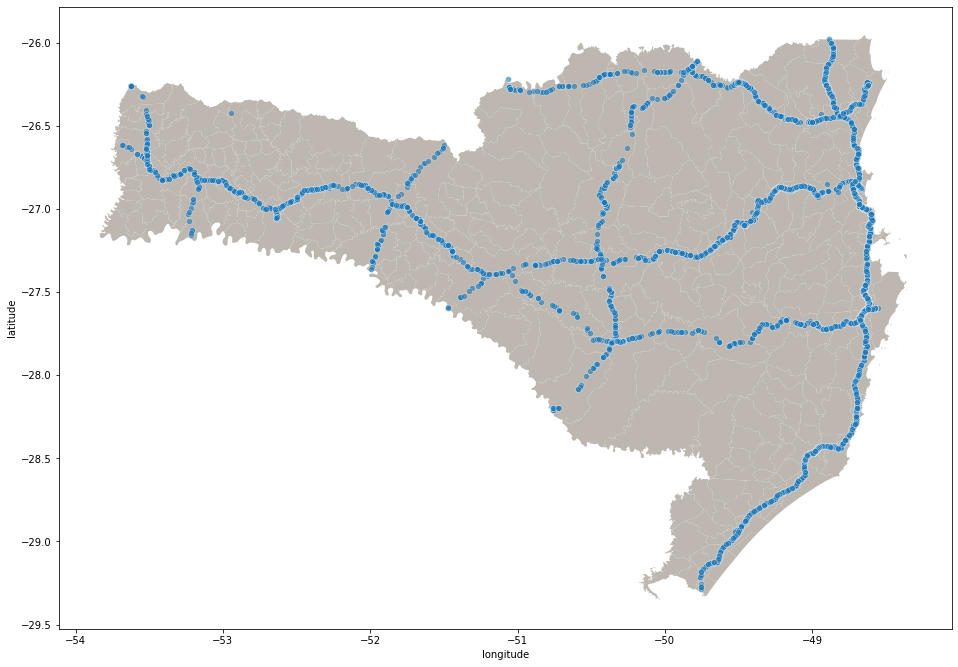

In [13]:
# Plota os registros no mapa do estado escolhido

fig, ax = plt.subplots()
df_shape.plot(ax=ax, color='#bdb7af')
sns.scatterplot(data=df_acidentes, x='longitude', y='latitude', alpha=0.6)

In [14]:
# Arredonda as coordenadas para 1 casa decimal e agrega os registros:

df_acidentes_agg = df_acidentes.copy()
df_acidentes_agg['latitude'] = df_acidentes_agg['latitude'].round(1)
df_acidentes_agg['longitude'] = df_acidentes_agg['longitude'].round(1)

df_acidentes_agg = df_acidentes_agg.groupby(['latitude', 'longitude']).agg(acidentes=('id', 'count')).reset_index()

In [15]:
df_acidentes_agg.head()

,latitude,longitude,acidentes
0,-29.3000,-49.8000,5
1,-29.2000,-49.8000,6
2,-29.2000,-49.7000,2
3,-29.1000,-49.7000,17
4,-29.1000,-49.6000,41


In [16]:
df_acidentes_agg.shape

(234, 3)

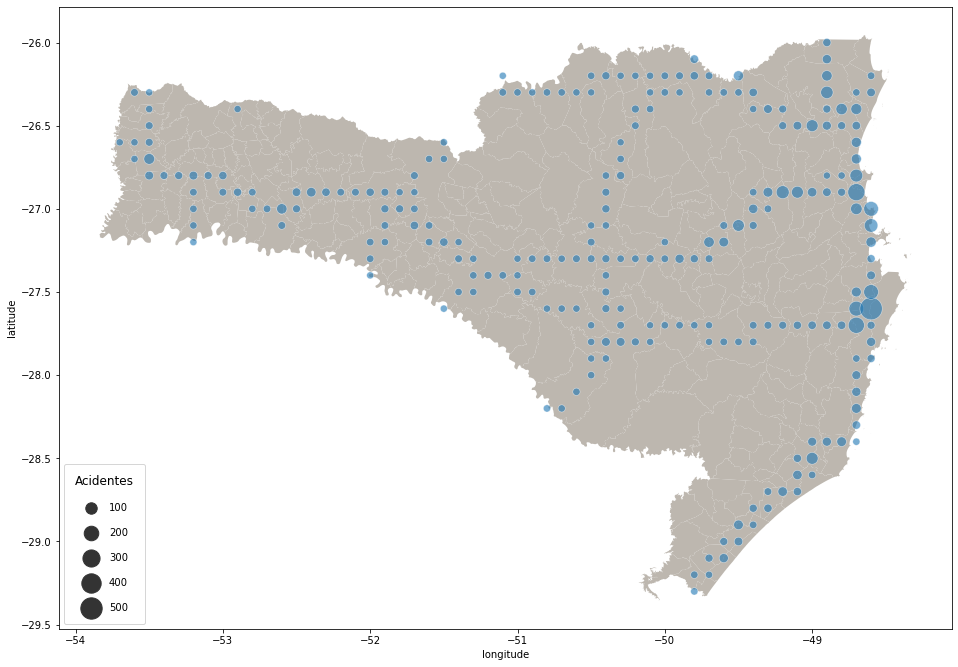

In [17]:
# Plota os registros agregados no mapa do estado escolhido:

fig, ax = plt.subplots()
df_shape.plot(ax=ax, color='#bdb7af')
sns.scatterplot(data=df_acidentes_agg, x='longitude', y='latitude', alpha=0.6, size='acidentes', sizes=(50,500))
plt.legend(title='Acidentes', title_fontsize=12, labelspacing=1.5, borderpad=1.1)

In [18]:
df_acidentes_agg['acidentes'].describe()

count   234.0000
mean     27.7308
std      54.0021
min       1.0000
25%       5.0000
50%      11.0000
75%      26.7500
max     555.0000
Name: acidentes, dtype: float64

# Formulação genérica

### Índices / Conjuntos

$I \colon \text{Conjunto pontos de demanda}, \{1, 2,\ldots, m\}$

$J \colon \text{Conjunto pontos candidatos à instalação de UOP}, \{1, 2, \ldots, n\}$


### Parâmetros

$d_{ij} \colon \text{Distância entre o ponto de demanda } i \in I \text{ e o ponto candidato } j \in J$

$h_{i} \colon \text{Número de acidentes no ponto de demanda } i \in I$

$p \colon \text{Número de UOPs a serem instaladas }$


 
### Variáveis de decisão

$
    y_{j} \colon
    \begin{cases}
      1, & \text{se o ponto candidato } j \in J \text{ é escolhido como mediana} \\
      0, & \text{caso contrário}
    \end{cases}
$

$
    x_{ij} \colon
    \begin{cases}
      1, & \text{se o ponto de demanda } i \in I \text{ é alocado à mediana } j \in J \\
      0, & \text{caso contrário}
    \end{cases}
$


### Formulação matemática


$\text{min }z = \sum\limits_{i \in I} \sum\limits_{j \in J} h_i d_{ij} x_{ij}$

sujeito a

$\sum\limits_{j \in J} y_{j} = p$

$\sum\limits_{j \in J} x_{ij} = 1, \forall \; i \in I$

$x_{ij} \leq y_j, \forall i \in I \text{, }j \in J$

$y_j \in \{0,1\}, \forall \; j \in J$

$x_{ij} \in \{0,1\}, \forall i \in I \text{, }j \in J$

# Preparação dos dados de entrada

In [19]:
# Criação da matriz de distâncias

from sklearn.neighbors import DistanceMetric

In [20]:
d = DistanceMetric.get_metric('euclidean')
distancias = df_acidentes_agg[['longitude', 'latitude']].to_numpy()
distancias = d.pairwise(distancias)

In [21]:
pd.DataFrame(distancias).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233
0,0.0000,0.1000,0.1414,0.2236,0.2828,0.3606,0.4243,0.5000,0.5657,0.6403,0.7071,0.7810,0.8485,0.9220,0.9899,1.0630,1.0630,1.1314,1.2042,1.2728,1.3454,1.4213,1.4866,1.4866,1.4213,1.5556,1.4422,1.6279,1.4765,1.7029,1.5652,1.5232,1.7804,1.8439,1.6553,1.6155,1.5811,1.5524,1.5297,1.5033,1.5133,1.5297,1.5524,1.9209,1.7464,1.6763,1.6279,1.6125,1.6031,1.6000,1.6031,1.6492,1.6763,1.7088,1.7464,1.7889,1.8358,1.8868,1.9416,2.0000,2.4042,1.9723,1.9235,1.8788,1.8028,1.7720,2.0248,2.0809,2.4083,2.3431,2.1633,2.1095,1.8974,2.1095,2.1633,2.9069,2.4207,2.3601,2.3022,2.2472,1.9925,2.2472,2.9732,2.5612,2.5000,2.3324,2.2825,2.2361,2.1932,2.1541,2.1190,2.0881,2.0616,2.0396,2.0224,2.0100,2.0025,2.0000,2.0025,2.3324,3.9962,3.0414,2.9698,2.7659,2.7019,2.6401,2.2136,2.1095,2.1024,2.1095,2.4187,4.0497,3.5609,3.0414,2.9069,2.8425,2.3087,2.2804,2.2091,2.2204,2.2361,2.5060,4.1049,3.7802,3.7014,3.6235,3.5468,3.1145,3.0480,2.9833,2.3770,2.3345,2.3537,2.5495,2.5942,4.1617,4.0000,3.9205,3.8419,3.6125,3.5384,3.4655,3.3941,3.3242,3.2558,3.1890,3.1241,3.0610,2.4739,2.4331,2.4515,2.4739,2.5000,2.5298,2.5632,2.6000,2.6401,4.4654,4.3829,4.3012,4.2202,4.1400,4.0608,3.1401,2.5710,2.5495,2.6571,2.6926,2.7313,4.6043,4.5222,3.1623,3.1064,2.6476,2.8231,4.7434,4.6615,4.5804,3.1906,2.7459,2.9155,4.6400,2.8284,2.8636,2.8862,2.9120,2.9411,2.9732,3.0083,4.7011,4.2450,2.9275,2.9155,2.9275,2.9428,2.9614,3.0364,3.0676,3.1016,4.8415,4.7634,3.2696,3.2311,3.1953,3.1623,3.1321,3.1048,3.0806,3.0150,3.0067,3.0017,3.0017,3.0067,3.0150,3.0265,3.1321,3.1953,3.2311,3.3615,3.1780,3.1575,3.1401,3.1257,3.1145,3.1064,3.1016,3.1000,3.1016,3.1145,3.2280,3.3242,3.2000,3.3242,3.4205
1,0.1000,0.0000,0.1000,0.1414,0.2236,0.2828,0.3606,0.4243,0.5000,0.5657,0.6403,0.7071,0.7810,0.8602,0.9220,1.0000,0.9899,1.0630,1.1314,1.2042,1.2806,1.3601,1.4213,1.4142,1.3454,1.4866,1.3601,1.5556,1.3892,1.6279,1.4765,1.4318,1.7029,1.7692,1.5652,1.5232,1.4866,1.4560,1.4318,1.4036,1.4142,1.4318,1.4560,1.8439,1.6553,1.5811,1.5297,1.5133,1.5033,1.5000,1.5033,1.5524,1.5811,1.6155,1.6553,1.7000,1.7493,1.8028,1.8601,1.9209,2.3345,1.8868,1.8358,1.7889,1.7088,1.6763,1.9416,2.0000,2.3345,2.2672,2.0809,2.0248,1.8028,2.0248,2.0809,2.8425,2.3431,2.2804,2.2204,2.1633,1.8974,2.1633,2.9069,2.4839,2.4207,2.2472,2.1954,2.1471,2.1024,2.0616,2.0248,1.9925,1.9647,1.9416,1.9235,1.9105,1.9026,1.9000,1.9026,2.2472,3.9446,2.9732,2.9000,2.6907,2.6249,2.5612,2.1190,2.0100,2.0025,2.0100,2.3324,3.9962,3.5000,2.9698,2.8320,2.7659,2.2136,2.1840,2.1095,2.1213,2.1378,2.4187,4.0497,3.7202,3.6401,3.5609,3.4828,3.0414,2.9732,2.9069,2.2804,2.2361,2.2561,2.4597,2.5060,4.1049,3.9408,3.8601,3.7802,3.5468,3.4713,3.3971,3.3242,3.2527,3.1828,3.1145,3.0480,2.9833,2.3770,2.3345,2.3537,2.3770,2.4042,2.4352,2.4698,2.5080,2.5495,4.4102,4.3267,4.2438,4.1617,4.0804,4.0000,3.0610,2.4739,2.4515,2.5632,2.6000,2.6401,4.5486,4.4654,3.0806,3.0232,2.5495,2.7313,4.6872,4.6043,4.5222,3.1064,2.6476,2.8231,4.5804,2.7295,2.7659,2.7893,2.8160,2.8460,2.8792,2.9155,4.6400,4.1773,2.8284,2.8160,2.8284,2.8443,2.8636,2.9411,2.9732,3.0083,4.7802,4.7011,3.1780,3.1385,3.1016,3.0676,3.0364,3.0083,2.9833,2.9155,2.9069,2.9017,2.9017,2.9069,2.9155,2.9275,3.0364,3.1016,3.1385,3.269

In [22]:
m = len(distancias)
n = len(distancias[0])

In [23]:
m

234

In [24]:
n

234

In [25]:
historico = df_acidentes_agg['acidentes']

In [26]:
uops = 27

# Modelo computacional

In [27]:
import pyomo.environ as pyo

In [28]:
# Declaração do modelo:

modelo = pyo.ConcreteModel()

In [29]:
# Declaração dos conjuntos:

modelo.I = pyo.RangeSet(m)
modelo.J = pyo.RangeSet(n)

In [30]:
# Declaração dos parâmetros:

modelo.d = pyo.Param(modelo.I, modelo.J, initialize=lambda modelo, i, j: distancias[i-1][j-1])
modelo.h = pyo.Param(modelo.I, initialize=lambda model, i: historico[i-1])
modelo.p = uops

In [31]:
# Declaração das variáveis de decisão:

modelo.y = pyo.Var(modelo.J, within=pyo.Binary)
modelo.x = pyo.Var(modelo.I, modelo.J, within=pyo.Binary)

$\text{min }z = \sum\limits_{i \in I} \sum\limits_{j \in J} h_i d_{ij} x_{ij}$

In [32]:
# Declaração da função objetivo:

def regra_fo(mod):
    return sum(mod.h[i] * mod.d[i,j] * mod.x[i,j] for i in mod.I for j in mod.J)

modelo.z = pyo.Objective(rule=regra_fo) # Default: minimize

$\sum\limits_{j \in J} y_{j} = p$

In [33]:
# Declaração das restrições:

def regra_restr1(mod):
    return sum(mod.y[j] for j in mod.J) == mod.p

modelo.restr_1 = pyo.Constraint(rule=regra_restr1)

$\sum\limits_{j \in J} x_{ij} = 1, \forall \; i \in I$

In [34]:
def regra_restr2(mod, i):
    return sum(mod.x[i,j] for j in mod.J) == 1

modelo.restr_2 = pyo.Constraint(modelo.I, rule=regra_restr2)

$x_{ij} \leq y_j, \forall i \in I \text{, }j \in J$

In [35]:
def regra_restr3(mod, i, j):
    return mod.x[i,j] <= mod.y[j]

modelo.restr_3 = pyo.Constraint(modelo.I, modelo.J, rule=regra_restr3)

In [36]:
resultado = pyo.SolverFactory('glpk').solve(modelo)
# resultado = pyo.SolverFactory('gurobi').solve(modelo)

In [37]:
resultado.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 585.061929040617
  Upper bound: 585.061929040617
  Number of objectives: 1
  Number of constraints: 54992
  Number of variables: 54991
  Number of nonzeros: 164503
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 6.826340198516846
# ----------------------------------------------------------
#   Solution Information
# ----

# Preparação dos dados de saída

In [38]:
df_out = df_acidentes_agg.copy()

In [39]:
df_out.head()

,latitude,longitude,acidentes
0,-29.3000,-49.8000,5
1,-29.2000,-49.8000,6
2,-29.2000,-49.7000,2
3,-29.1000,-49.7000,17
4,-29.1000,-49.6000,41


In [40]:
Y = list(modelo.y.keys())
df_out['uop'] = [int(modelo.y[j]()) for j in Y]

In [41]:
df_out.head()

,latitude,longitude,acidentes,uop
0,-29.3000,-49.8000,5,0
1,-29.2000,-49.8000,6,0
2,-29.2000,-49.7000,2,0
3,-29.1000,-49.7000,17,0
4,-29.1000,-49.6000,41,0


In [42]:
df_out['uop'].value_counts()

0    207
1     27
Name: uop, dtype: int64

In [43]:
X = list(modelo.x.keys())
alocacoes = [x for x in X if modelo.x[x]() == 1] # extrai os pares de alocações, ex: (1,6)
alocacoes.sort(key=lambda x:x[0]) # ordena os pares com relação aos pontos de demanda

In [44]:
df_out['ponto_demanda'] = [x[0] for x in alocacoes]
df_out['uop_alocada'] = [x[1] for x in alocacoes]

In [45]:
df_out.head()

,latitude,longitude,acidentes,uop,ponto_demanda,uop_alocada
0,-29.3000,-49.8000,5,0,1,6
1,-29.2000,-49.8000,6,0,2,6
2,-29.2000,-49.7000,2,0,3,6
3,-29.1000,-49.7000,17,0,4,6
4,-29.1000,-49.6000,41,0,5,6


In [46]:
df_uop = df_out[df_out['uop'] == 1].copy()

In [47]:
df_uop.rename(columns={
    'latitude': 'latitude_uop', 
    'longitude': 'longitude_uop'}, inplace=True)

In [48]:
df_out = df_out.merge(
    df_uop[['ponto_demanda', 'latitude_uop', 'longitude_uop']], 
    how='inner', 
    left_on='uop_alocada', 
    right_on='ponto_demanda').drop(columns='ponto_demanda_y').rename(columns={'ponto_demanda_x': 'ponto_demanda'})

In [49]:
df_out.head()

,latitude,longitude,acidentes,uop,ponto_demanda,uop_alocada,latitude_uop,longitude_uop
0,-29.3000,-49.8000,5,0,1,6,-29.0000,-49.6000
1,-29.2000,-49.8000,6,0,2,6,-29.0000,-49.6000
2,-29.2000,-49.7000,2,0,3,6,-29.0000,-49.6000
3,-29.1000,-49.7000,17,0,4,6,-29.0000,-49.6000
4,-29.1000,-49.6000,41,0,5,6,-29.0000,-49.6000


# Visualização

In [50]:
df_uop = df_out[df_out.uop == 1].copy()
df_uop['acidentes'] = 1
df_uop['Ponto'] = 'UOP'

df_out['Ponto'] = 'Demanda'

df_plot = pd.concat([df_out, df_uop], ignore_index=True)

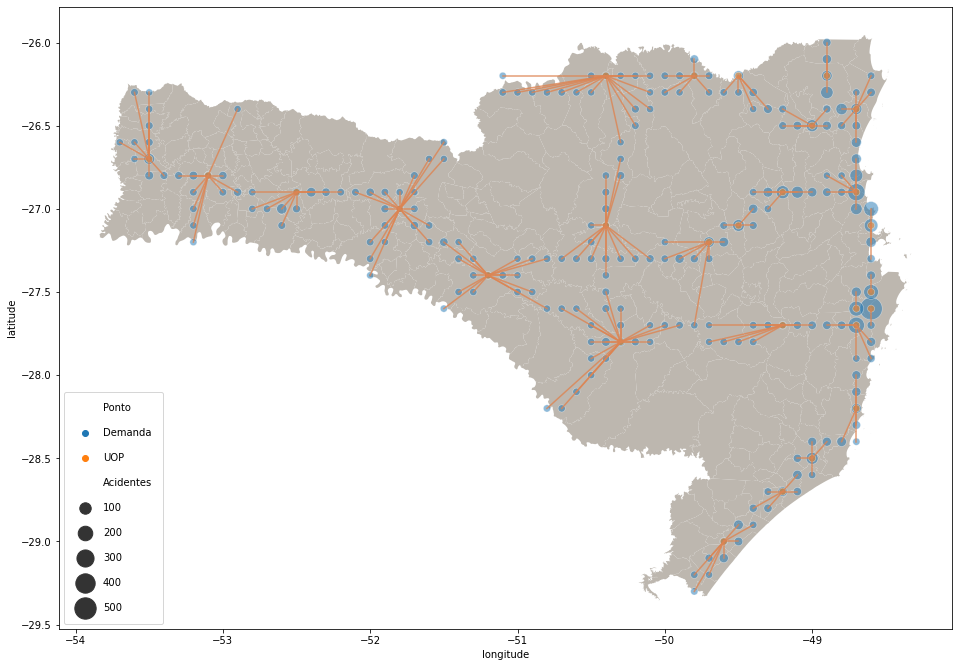

In [51]:
fig, ax = plt.subplots()
df_shape.plot(ax=ax, color='#bdb7af')

sns.scatterplot(
    data=df_plot.rename(columns={'acidentes': 'Acidentes'}), 
    x='longitude', 
    y='latitude', 
    hue='Ponto', 
    size='Acidentes', 
    sizes=(50, 500), 
    alpha=0.5)

plt.legend(title='', title_fontsize=12, labelspacing=1.5, borderpad=1.1)

for row in df_out.itertuples():
    lat0 = row.latitude
    lat1 = row.latitude_uop
    lon0 = row.longitude
    lon1 = row.longitude_uop
    x = (lon0, lon1)
    y = (lat0, lat1)
    plt.plot(x, y, color='#dd8452', alpha=0.8)

# Trabalhando com modelo abstrato

In [52]:
# Declaração do modelo abstrato

modelo_abs = pyo.AbstractModel()

In [53]:
# Declaração dos parâmetros auxiliares:

modelo_abs.m = pyo.Param()
modelo_abs.n = pyo.Param()
modelo_abs.distancias = pyo.Param(within=pyo.Any)
modelo_abs.historico = pyo.Param(within=pyo.Any)

In [54]:
# Declaração dos índices:

modelo_abs.I = pyo.RangeSet(modelo_abs.m)
modelo_abs.J = pyo.RangeSet(modelo_abs.m)

In [55]:
# Declaracao dos parâmetros:

modelo_abs.d = pyo.Param(modelo_abs.I, modelo_abs.J, initialize=lambda modelo_abs, i, j: modelo_abs.distancias()[i-1][j-1], mutable=True)
modelo_abs.h = pyo.Param(modelo_abs.I, initialize=lambda modelo_abs, i: modelo_abs.historico()[i-1])
modelo_abs.p = pyo.Param()

In [56]:
# Declaração das variáveis de decisão:

modelo_abs.y = pyo.Var(modelo_abs.J, within=pyo.Binary)
modelo_abs.x = pyo.Var(modelo_abs.I, modelo_abs.J, within=pyo.Binary)

In [57]:
# Declaração da função objetivo:

def regra_fo(mod):
    return sum(mod.h[i] * mod.d[i,j] * mod.x[i,j] for i in mod.I for j in mod.J)
modelo_abs.z = pyo.Objective(rule=regra_fo) # Default: minimize

In [58]:
# Declaração das restrições:

def regra_restr1(mod):
    return sum(mod.y[j] for j in mod.J) == mod.p
modelo_abs.restr_1 = pyo.Constraint(rule=regra_restr1)

def regra_restr2(mod, i):
    return sum(mod.x[i,j] for j in mod.J) == 1
modelo_abs.restr_2 = pyo.Constraint(modelo_abs.I, rule=regra_restr2)

def regra_restr3(mod, i, j):
    return mod.x[i,j] <= mod.y[j]
modelo_abs.restr_3 = pyo.Constraint(modelo_abs.I, modelo_abs.J, rule=regra_restr3)

# Instância 1: p = 27

## Dados de entrada:

In [59]:
# Matriz de distâncias:

d = DistanceMetric.get_metric('euclidean')
distancias = df_acidentes_agg[['longitude', 'latitude']].to_numpy()
distancias = d.pairwise(distancias)

In [60]:
# Índices:

m = len(distancias)
n = len(distancias[0])

In [61]:
# Histórico de acidentes:

historico = df_acidentes_agg['acidentes']

In [62]:
# UOPs:

uops = 27

In [63]:
# Criação do dicionário de parâmetros
# Os nomes das chaves devem ser exatamente iguais aos definidos nos parâmetros do modelo abstrato.

params_instancia1 = {
    "m": m,
    "n": n,
    "distancias": distancias,
    "historico": historico,
    "p": uops
}

In [64]:
# Converte os parâmetros para DataPortal():


data_portal_instancia1 = pyo.DataPortal()
for key in params_instancia1:
    data_portal_instancia1[key] = {None: params_instancia1[key]}

In [65]:
# Cria a instância 1:

instancia1 = modelo_abs.create_instance(data_portal_instancia1) 

In [66]:
# Resolve a instância 1:

result_instancia1 = pyo.SolverFactory('glpk').solve(instancia1)

In [67]:
result_instancia1.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 585.061929040617
  Upper bound: 585.061929040617
  Number of objectives: 1
  Number of constraints: 54992
  Number of variables: 54991
  Number of nonzeros: 164503
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 5.7976319789886475
# ----------------------------------------------------------
#   Solution Information
# ---

# Instância 2: p = 20

In [68]:
params_instancia2 = {
    "m": m,
    "n": n,
    "distancias": distancias,
    "historico": historico,
    "p": 20
}

In [69]:
# Converte os parâmetros para DataPortal():

data_portal_instancia2 = pyo.DataPortal()
for key in params_instancia2:
    data_portal_instancia2[key] = {None: params_instancia2[key]}

In [70]:
# Cria a instância 2:

instancia2 = modelo_abs.create_instance(data_portal_instancia2) 

In [71]:
# Resolve a instância 2:

result_instancia2 = pyo.SolverFactory('glpk').solve(instancia2)

In [72]:
result_instancia2.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 766.82642937106
  Upper bound: 766.82642937106
  Number of objectives: 1
  Number of constraints: 54992
  Number of variables: 54991
  Number of nonzeros: 164503
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 9.984433889389038
# ----------------------------------------------------------
#   Solution Information
# ------

# Variando o valor de p

In [73]:
from pyomo.opt import TerminationCondition

In [74]:
P = range(10,32,2)

In [75]:
[p for p in P]

[10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]

In [76]:
params = {
    "m": m,
    "n": n,
    "distancias": distancias,
    "historico": historico
}

In [77]:
# Dicionário para receber os dados de saída:

dados_fo = {'p': [], 'fo': []}

In [78]:
for p in P:
    
    # Inclui o valor de p no dicionário de parâmetros:
    params['p'] = p
    
    # Converte o dicionário de parâmetros para DataPortal()
    data_portal = pyo.DataPortal()
    for key in params:
        data_portal[key] = {None: params[key]}
        
    # Cria a instância:
    instancia = modelo_abs.create_instance(data_portal)
    
    # Resolve a instância:
    resultado_instancia = pyo.SolverFactory('glpk').solve(instancia)
    
    # Verifica se a solução é factível:
    solucao_factivel = not resultado_instancia.solver.termination_condition == TerminationCondition.infeasible
    
    if solucao_factivel:
        z = instancia.z()
    else:
        z = 0
    
    # Inclui os dados de saída no dicionário:
    dados_fo['p'].append(p) 
    dados_fo['fo'].append(z)

In [79]:
# Converte os dados de saída em DataFrame:

df_out = pd.DataFrame(dados_fo)

In [80]:
df_out.head()

,p,fo
0,10,1369.7490
1,12,1144.9628
2,14,1022.3463
3,16,917.0893
4,18,837.1750


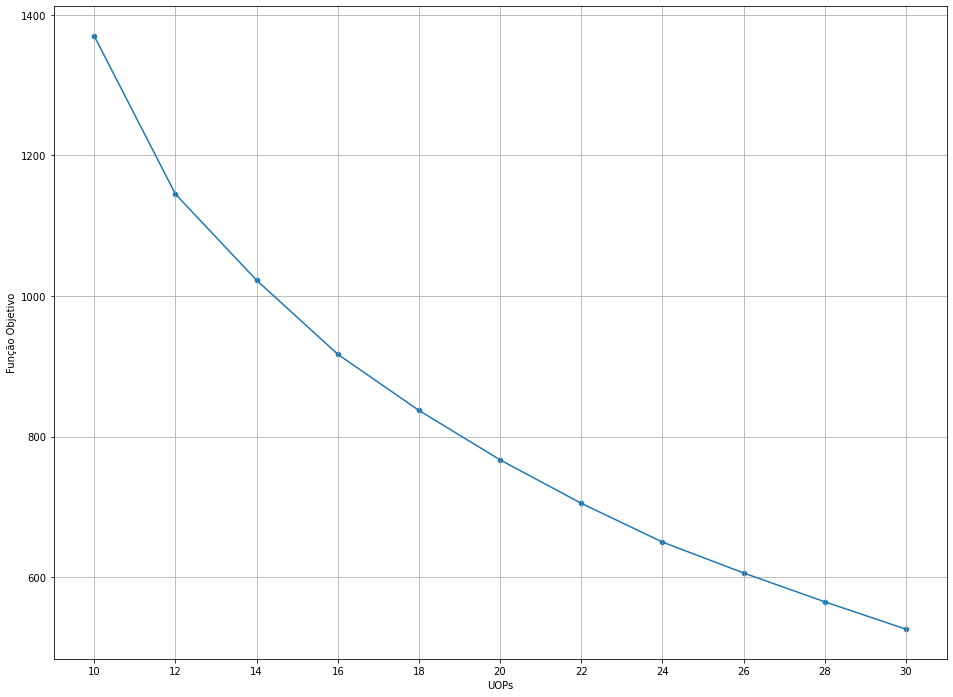

In [81]:
sns.lineplot(data=df_out, x='p', y='fo')
sns.scatterplot(data=df_out, x='p', y='fo')
plt.xlabel('UOPs')
plt.ylabel('Função Objetivo')
plt.xticks(range(10,32,2))
plt.grid()